# **Analyzing Media Bias in ESG Coverage: A Semantic Similarity Approach**

## ***Introduction***

In recent years, Environmental, Social, and Governance (ESG) criteria have become pivotal in shaping corporate strategies, investor decisions, and public perceptions. As ESG considerations integrate deeply into the operational and strategic frameworks of S&P 500 companies, the role of media in disseminating ESG-related information becomes increasingly significant. Media outlets, by choosing what to cover and how to present it, play a crucial role in shaping the discourse around ESG issues.

The importance of ESG factors in the corporate and investment realms has been underscored by a myriad of studies and real-world examples. For instance, a seminal paper by Eccles, Ioannou, and Serafeim (2014) demonstrated a positive correlation between high performance on relevant ESG metrics and superior financial performance, highlighting how sustainability initiatives can contribute to a company's bottom line. Furthermore, the fallout from the Volkswagen emissions scandal, widely covered in the media, exemplified the significant impact of neglecting ESG principles on a company's reputation and financial health. Such precedents underscore the intricate relationship between ESG practices, media coverage, and corporate outcomes.

Building upon these foundations, this study aims to examine the coverage patterns of ESG topics by four major news providers: **CNBC.com, Forbes.com, BusinessInsider.com, and DailyMail.co.uk**. Drawing from a rich dataset of 24,000 news articles distributed equally among these providers, our research delves into potential biases and focus areas in ESG reporting. Leveraging the SASB (Sustainability Accounting Standards Board) framework, which provides detailed ESG topics and definitions across various industries, and utilizing SpaCy's semantic similarity capabilities, this study aims to map news content to ESG topics. This approach enables a nuanced understanding of media coverage in relation to ESG considerations, shedding light on how the discourse surrounding these critical issues is shaped by the media.

## ***Research Question***

The central inquiry of this study revolves around whether certain news companies exhibit a propensity to cover specific ESG topics more than others. Specifically, the research seeks to identify if there is a discernible pattern in the ESG topics covered by CNBC.com, Forbes.com, BusinessInsider.com, and DailyMail.co.uk, and whether these patterns indicate a bias or specialization in their reporting. This inquiry is anchored in the broader question of media's role in ESG discourse and its potential impact on public and investor perceptions.

**Null Hypothesis (H0)**: There is no significant difference in the coverage of ESG topics among the selected news companies, indicating a uniform approach to ESG reporting across these platforms.

**Alternative Hypothesis (H1)**: There is a significant difference in the coverage of ESG topics among the selected news companies, suggesting a bias or specialization in their ESG reporting.

## ***Data***

### Overview

This research is underpinned by the utilization of three primary datasets, each serving a crucial role in the analysis:

#### **Dataset 1: News Articles Dataset**
The primary dataset used in this analysis provided by Perigon, which includes an expansive collection of approximately 176,000 news articles spanning from September 2022 to September 2023. This dataset is rich in details, featuring the source of each news article (identifying the news company), the publication date, and the specific S&P 500 company involved, denoted by its ticker symbol. This dataset is instrumental in understanding the breadth and depth of ESG coverage across different news platforms.

However, due to computational resource constraints, our analysis is specifically concentrated on a subset of 24,000 articles. This subset represents a balanced selection from the top four largest news providers within our dataset: CNBC.com, Forbes.com, BusinessInsider.com, and DailyMail.co.uk. We sampled 6,000 articles randomly from each news provider to ensure a comprehensive representation of their ESG coverage.

here are multiple variables/columns in this dataset, but we are only focused on:

1. Ticker - The company associated with the news article
2. Source Domain - The news outlet/company
3. Content  - The news content

#### **Dataset 2: ESG Definitions Dataset**
To delineate and classify ESG topics effectively, we use definitions for various ESG categories from the Sustainability Accounting Standards Board (SASB). This dataset provides a structured and authoritative framework for ESG topics, categorized by industry and sector, enabling a nuanced and precise analysis of ESG coverage in news articles. 

There are 4 variables/columns in this dataset:

1. Sector
2. Industry
3. Topic - ESG topics relevant to the corresponding sector and industry.
4. Definition - The definition of that ESG topic.

#### **Supplementary Dataset: S&P 500 Companies' Sectors and Industries Dataset**
A critical component of our analysis involves mapping the ESG definitions to specific news articles. To accomplish this, we employed an additional dataset that catalogues each S&P 500 company along with its respective industry and sector. This dataset serves as a bridge, facilitating the alignment of news articles with relevant ESG definitions by linking the company mentioned in the news (via its ticker symbol) to its corresponding industry and sector. This is vital for ensuring that the analysis of ESG topics is contextually relevant and accurately attributed to the appropriate sectors and industries.

There are 3 variables/columns in this dataset:

1. Ticker - The company ticker/name
2. Sector - The sector of the company
3. Industry - The industry of the company

Together, these datasets form the foundation of our study, enabling a comprehensive and detailed examination of ESG topic coverage in the media. By integrating information from these diverse sources, we are equipped to analyze the intersection of corporate focus, media attention, and ESG priorities within the framework of S&P 500 companies.

In [2]:
import pandas as pd

# Load the 3 datasets
articles_df = pd.read_csv('articles.csv')
esg_topics_df = pd.read_csv('SASB_Topics.csv')
scraping_df = pd.read_excel('scraping.xlsx')

/Users/promod/anaconda3/envs/python38/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Initial Exploratory Data Analysis

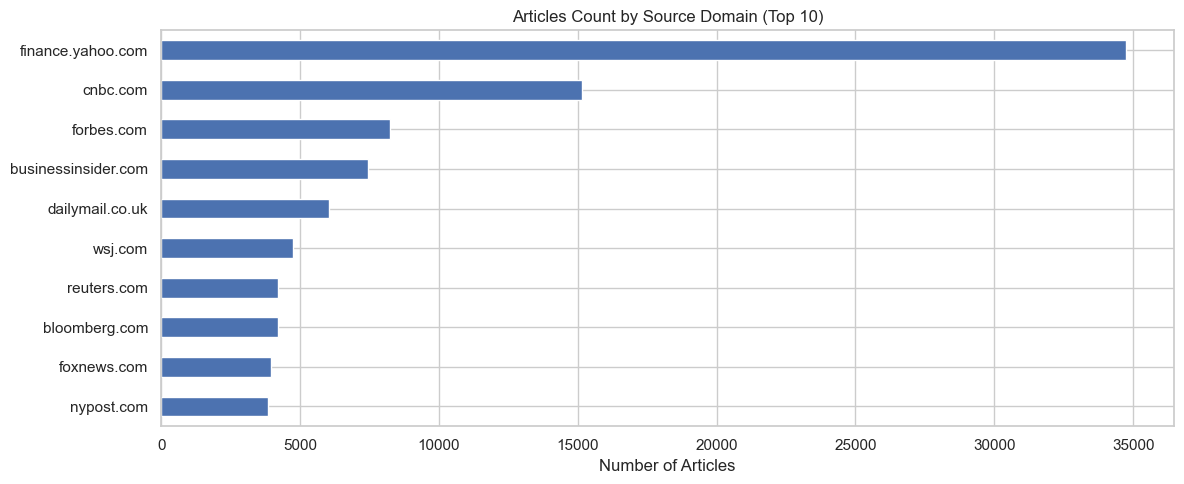

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Determine the top 10 sources
top_10_sources_counts = articles_df['Source Domain'].value_counts().head(10)

# Sort the top 10 source counts in ascending order for better plotting
top_10_sources_counts_sorted = top_10_sources_counts.sort_values(ascending=True)

# Create the barh plot for the top 10 sources
plt.figure(figsize=(12, 5))
top_10_sources_counts_sorted.plot(kind='barh')
plt.title('Articles Count by Source Domain (Top 10)')
plt.xlabel('Number of Articles')
plt.tight_layout() 
plt.show()

In [5]:
top_10_table = top_10_sources_counts.reset_index()
top_10_table.columns = ['Source Domain', 'Number of Articles']
top_10_table

,Source Domain,Number of Articles
0,finance.yahoo.com,34734
1,cnbc.com,15134
2,forbes.com,8223
3,businessinsider.com,7452
4,dailymail.co.uk,6032
5,wsj.com,4757
6,reuters.com,4217
7,bloomberg.com,4202
8,foxnews.com,3942
9,nypost.com,3859


Yahoo News functions primarily as a news aggregator rather than a direct news provider. Therefore, we refined our analysis to exclude their articles from the dataset to ensure that our study focuses on content originated by the news providers themselves. Consequently, we concentrated our attention on the four largest original news content providers from our collection: CNBC, Forbes, Business Insider, and Daily Mail. This approach allows us to delve into a more precise analysis of the direct reporting styles and focuses of these prominent media entities on ESG topics.

## ***Data Wrangling***

### Adding Sector and Industries
Since our articles_df does not contain Sector and Industry, we need to map the Ticker and map these from our third dataset before we can do the Semantic Similarity calculation.

In [6]:
# Merge the datasets on 'Ticker'
merged_df = pd.merge(articles_df, scraping_df, on='Ticker', how='left')

merged_df.head(3)

,Ticker,Source Domain,pubDate,Title,Content,Summary,Sentiment,Sector,Industry
0,MMM,finance.yahoo.com,2023-09-07T12:56:00+00:00,The Zacks Analyst Blog Highlights JPMorgan Cha...,"Chicago, IL – September 7, 2023 – Zacks.com an...",The Zacks Equity Research blog highlights the ...,"Positive: 0.9409727, Negative: 0.010997801, Ne...",Resource Transformation,Chemicals
1,MMM,finance.yahoo.com,2023-09-05T21:45:20+00:00,3M (MMM) Stock Moves -0.09%: What You Should Know,3M (MMM) closed the most recent trading day at...,3M (MMM) closed the most recent trading day at...,"Positive: 0.14384441, Negative: 0.7276543, Neu...",Resource Transformation,Chemicals
2,MMM,finance.yahoo.com,2023-08-30T21:45:18+00:00,3M (MMM) Stock Sinks As Market Gains: What You...,"In the latest trading session, 3M (MMM) closed...","In the latest trading session, 3M (MMM) closed...","Positive: 0.083580546, Negative: 0.8612031, Ne...",Resource Transformation,Chemicals


### Random sampling to only include the four lagest companies
Since we will be only focusing on the top 4 news companies in our dataset, we need to make sure our dataset contains an equal sample of news articels from each news company for an unbiased analysis. 

First step excludes a specific source ('finance.yahoo.com') to identify the top four sources for consideration. The dataset is then filtered to only include articles from these identified sources. To maintain equal representation, the for loop calculates the requisite number of articles from each source, aiming for an aggregate of 10,000 articles. Through a randomized process, the code ensures an equal distribution of articles from each source by collecting 6,000 articles per source, thus eliminating selection bias. The final dataset comprises 24,000 articles, verified through a distribution check across the news sources, thereby creating a balanced corpus for subsequent analytical tasks.

In [26]:
# Determine the top 4 sources excluding "finance.yahoo.com"
top_sources_excluding_yahoo = merged_df[merged_df['Source Domain'] != 'finance.yahoo.com']['Source Domain'].value_counts().head(4).index.tolist()

# Filter 'merged_df' to only include articles from these top 4 sources
top_4_df = merged_df[merged_df['Source Domain'].isin(top_sources_excluding_yahoo)]

# Now we want to sample an equal number of articles from each of these 4 sources
# Calculate the number of articles to sample from each source to get a total of 10000
articles_per_source = 24000 // len(top_sources_excluding_yahoo)  # Integer division

# Sample the articles
sampled_df = pd.DataFrame()  # Create an empty DataFrame to hold our samples
for source in top_sources_excluding_yahoo:
    # Sample 'articles_per_source' number of articles from each source
    source_sample = top_4_df[top_4_df['Source Domain'] == source].sample(n=articles_per_source, random_state=1)
    # Append to our sampled DataFrame
    sampled_df = pd.concat([sampled_df, source_sample])

# Ffinal size and distribution of the sampled DataFrame
print(sampled_df['Source Domain'].value_counts())
print(f"Total number of sampled articles: {len(sampled_df)}")


cnbc.com               6000
forbes.com             6000
businessinsider.com    6000
dailymail.co.uk        6000
Name: Source Domain, dtype: int64
Total number of sampled articles: 24000


## ***NLP Analysis***

### Cleaninng and Preprocessing

First we need to make sure our dataset is clean and standardized before we apply any NLP applications. We used 2 preproccesing functions. 
1. Removal of HTML tags and non-alphabetic characters from news and SASB defintions.
2. Then we employ SpaCy's linguistic features to exclude common stopwords and apply lemmatization, transforming words to their base or dictionary form. This streamlining of text is essential for reducing dimensionality and improving the performance of subsequent NLP tasks. 

Progress tracking is integrated using tqdm, giving real-time feedback as each text entry in the dataset is processed.

In [9]:
import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm.auto import tqdm

# Load the large SpaCy model
nlp = spacy.load('en_core_web_lg')

# Initialize tqdm to work with pandas apply()
tqdm.pandas()

# Preprocessing functions
def remove_noise(text):
    """Remove HTML tags and non-linguistic symbols."""
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-linguistic symbols, keeping only letters and spaces
    return text.strip()

def remove_stopwords_and_lemmatize(text):
    """Remove stopwords and lemmatize the text."""
    doc = nlp(text)
    result = ' '.join([token.lemma_ for token in doc if token.text.lower() not in STOP_WORDS])
    return result

# Applying preprocessing with progress bar
sampled_df['Content'] = sampled_df['Content'].progress_apply(lambda x: remove_stopwords_and_lemmatize(remove_noise(x)))
esg_topics_df['Definition'] = esg_topics_df['Definition'].progress_apply(lambda x: remove_stopwords_and_lemmatize(remove_noise(x)))


  0%|          | 0/24000 [00:00<?, ?it/s]

  0%|          | 0/398 [00:00<?, ?it/s]

### Semantic Similarity

Now we leverage SpaCy NLP library to compute the semantic similarity between the content of each news article and the predefined ESG definitions and topics. 

We establish the relevance of each ESG topic to the article based on the highest similarity score, thereby assigning the most relevant topic to the article. In the iterative process, each article is matched with ESG topics filtered by relevant sectors and industries to ensure context-specific comparisons. If no ESG topics are relevant to the article's sector and industry, a 'No Match' label is assigned. Finally, the identified topics and their similarity scores are appended to the original DataFrame.

In [13]:
from tqdm import tqdm 

# Load the large SpaCy model
nlp = spacy.load('en_core_web_lg')

def find_most_relevant_esg_topic(article, esg_df):
    article_doc = nlp(article['Content'])
    
    max_similarity = 0
    most_relevant_topic = None
    for _, esg_row in esg_df.iterrows():
        esg_doc = nlp(esg_row['Definition'])
        similarity = article_doc.similarity(esg_doc)
        if similarity > max_similarity:
            max_similarity = similarity
            most_relevant_topic = esg_row['Topic']
    
    return most_relevant_topic, max_similarity

# Assuming sampled_df is your DataFrame with news articles
relevant_topics = []
for _, row in tqdm(sampled_df.iterrows(), total=sampled_df.shape[0]):
    relevant_esg_df = esg_topics_df[(esg_topics_df['Sector'] == row['Sector']) & (esg_topics_df['Industry'] == row['Industry'])]
    if relevant_esg_df.empty:
        relevant_topics.append(('No Match', 0))
        continue
    
    topic, score = find_most_relevant_esg_topic(row, relevant_esg_df)
    relevant_topics.append((topic, score))

# Adding the most relevant ESG topic and its similarity score to the DataFrame
sampled_df['ESG_Topic'], sampled_df['ESG_Similarity_Score'] = zip(*relevant_topics)

sampled_df.to_csv("output_new.csv")

100%|██████████| 24000/24000 [57:59<00:00,  6.90it/s] 


## ***Statistical Analysis***

We first begin with descriptive statistics to summarize the main features of our dataset, including the distribution and central tendencies of ESG topic coverage by different news providers. Following this, we assess crucial statistical assumptions, specifically testing for normality and equal variances across our data, to ensure the appropriateness of subsequent analysis techniques. Finally, we advance to hypothesis testing, employing the Chi-Squared test for independence to explore the relationship between news providers and ESG topic coverage, and the Kruskal-Wallis test to investigate differences in ESG topic mentions across various groups.

First let's load the output file we saved from our SpaCy semantic similarity analysis.

In [3]:
df = pd.read_csv('output_new.csv')

In [4]:
df. head(3)

,Unnamed: 0,Ticker,Source Domain,pubDate,Title,Content,Summary,Sentiment,Sector,Industry,ESG_Topic,ESG_Similarity_Score
0,107930,META,cnbc.com,2023-01-29T12:24:02+00:00,Earnings are showing signs of strain and are l...,earning fourth quarter not dire investor fear ...,"""My takeaway from the guidance has been the se...","Positive: 0.009998435, Negative: 0.9720862, Ne...",Technology & Communications,Internet Media & Services,"Employee Recruitment, Inclusion & Performance",0.879889
1,64454,FDX,cnbc.com,2023-04-06T11:12:14+00:00,Raymond James says an 'undeniable change' is a...,Raymond James optimistic FedEx shipping giant ...,Raymond James is optimistic about FedEx's cost...,"Positive: 0.91801095, Negative: 0.012704242, N...",Transportation,Air Freight & Logistics,Supply Chain Management,0.915202
2,86346,GM,cnbc.com,2023-08-29T12:00:02+00:00,"GM, Google exploring AI use cases across autom...",GM logo see facade General Motors headquarters...,General Motors and Google are working together...,"Positive: 0.24879937, Negative: 0.010234137, N...",Transportation,Automobiles,Materials Sourcing,0.861998


### Descriptive Statisitcs

         Source Domain      mean    median       std
0  businessinsider.com  0.850889  0.863717  0.057554
1             cnbc.com  0.874151  0.882727  0.048232
2      dailymail.co.uk  0.795235  0.809688  0.089099
3           forbes.com  0.864162  0.881003  0.072861


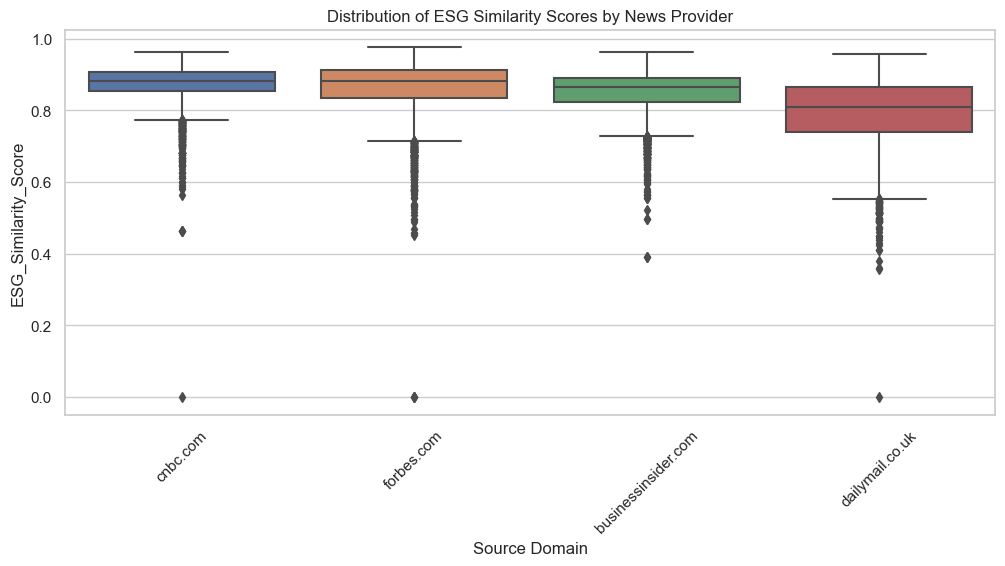

In [15]:
# Descriptive statistics for ESG_Similarity_Score by each news provider
desc_stats = df.groupby('Source Domain')['ESG_Similarity_Score'].agg(['mean', 'median', 'std']).reset_index()
print(desc_stats)

# Distribution plots for ESG_Similarity_Score for each news provider
plt.figure(figsize=(12, 5))
sns.boxplot(x='Source Domain', y='ESG_Similarity_Score', data=df)
plt.title('Distribution of ESG Similarity Scores by News Provider')
plt.xticks(rotation=45)  
plt.show()

The table at the top provides a concise summary of the mean, median, and standard deviation of the ESG similarity scores for each news provider. This numerical summary indicates cnbc.com has the highest mean similarity score, suggesting a closer alignment, on average, with ESG topics compared to the other sources.

Below the table, a boxplot visualizes the distribution of ESG similarity scores for each news provider. This type of plot provides a clear view of the central tendency, spread, and outliers in the data. The box represents the interquartile range (IQR), the line inside the box marks the median, and the 'whiskers' extend to the furthest points that are not considered outliers. Points plotted beyond the whiskers are outliers that deviate significantly from the rest of the data.

From the boxplot, we can observe that cnbc.com has the highest median and a very tight Inter Quantile Range indicating less variability in its ESG similarity scores. On the other hand dailymail.co.uk display more variability and have the smallest median, suggesting a wider range of relevance to ESG topics within their articles.

In [25]:
top_3_topics_per_provider = df.groupby('Source Domain')['ESG_Topic'] \
                              .value_counts() \
                              .groupby(level=0) \
                              .head(3) \
                              .reset_index(name='Count')

top_3_topics_per_provider

,Source Domain,ESG_Topic,Count
0,businessinsider.com,"Data Privacy, Advertising Standards & Freedom ...",909
1,businessinsider.com,Product Safety,444
2,businessinsider.com,Data Security,398
3,cnbc.com,"Data Privacy, Advertising Standards & Freedom ...",528
4,cnbc.com,Business Ethics,485
5,cnbc.com,Data Security,440
6,dailymail.co.uk,Journalistic Integrity & Sponsorship Identific...,792
7,dailymail.co.uk,"Data Privacy, Advertising Standards & Freedom ...",674
8,dailymail.co.uk,Product Safety,445
9,forbes.com,"Data Privacy, Advertising Standards & Freedom ...",895


Here we can see that 'Data Privacy, Advertising Standards & Freedom' appears as a common leading topic among three of the news providers, indicating a strong focus on issues related to consumer data protection and ethical advertising. Businessinsider.com shows a predominant interest in 'Data Privacy' followed by 'Product Safety' and 'Data Security', suggesting a tech-oriented ESG reporting angle. Cnbc.com also emphasizes 'Business Ethics', besides 'Data Privacy', hinting at a balanced approach towards corporate governance and privacy concerns. Dailymail.co.uk, on the other hand, appears to prioritize 'Journalistic Integrity & Sponsorship Identification', reflecting a strong inclination towards media transparency and ethics.

Forbes.com shares commonality with the others in focusing on 'Data Privacy' but also shows significant coverage of 'Journalistic Integrity & Sponsorship Identification'. These topics suggest an interest in the ethical dimensions of journalism and advertising practices.

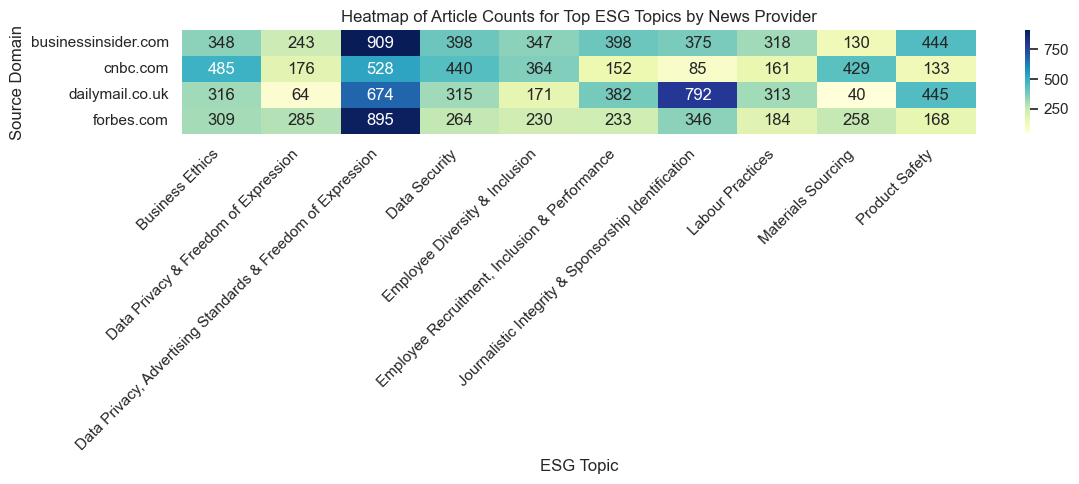

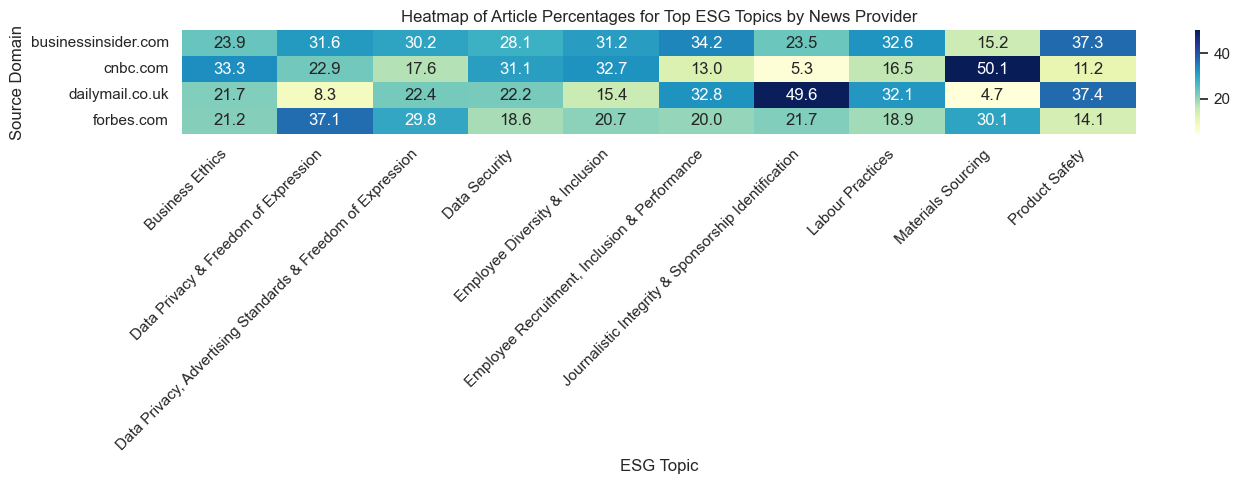

In [16]:
top_topics = df.groupby('ESG_Topic').size().nlargest(10).index

# A matrix of counts for each provider-topic pair
matrix_data1 = df[df['ESG_Topic'].isin(top_topics)].pivot_table(index='Source Domain', 
                                                               columns='ESG_Topic', 
                                                               aggfunc='size', 
                                                               fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(matrix_data1, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Article Counts for Top ESG Topics by News Provider')
plt.xlabel('ESG Topic')
plt.ylabel('Source Domain')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0) 
plt.tight_layout()  
plt.show()

# Create a matrix of counts for each provider-topic pair
matrix_data = df[df['ESG_Topic'].isin(top_topics)].pivot_table(index='Source Domain', 
                                                               columns='ESG_Topic', 
                                                               aggfunc='size', 
                                                               fill_value=0)

# Calculate the percentages rather than raw counts
# Divide each cell by the row sum and multiply by 100
matrix_percentage = matrix_data.div(matrix_data.sum(axis=0), axis=1) * 100

# Plot the heatmap with percentages
plt.figure(figsize=(14, 5))
sns.heatmap(matrix_percentage, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Article Percentages for Top ESG Topics by News Provider')
plt.xlabel('ESG Topic')
plt.ylabel('Source Domain')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0) 
plt.tight_layout() 
plt.show()


In this analysis, each news provider's distinct profile suggests how their reporting priorities align with various ESG themes. The heatmap effectively captures these nuances, with warmer colors indicating higher article percentages, thereby allowing for an at-a-glance understanding of how different organizations address ESG concerns within their content. 

Forbes.com shows a particular focus on 'Data Privacy, Advertising Standards & Freedom', whereas dailymail.co.uk appears to prioritize 'Journalistic Integrity & Sponsorship Identification' as its most covered topic. On the other hand, cnbc.com exhibits a relatively balanced coverage across several topics, with 'Business Ethics' and 'Data Security' being notably prominent. Businessinsider.com displays a substantial focus on 'Data Privacy, Advertising Standards & Freedom', followed closely by 'Data Security'.

### Statistical Assumptions

Before conducting any hypothesis testing, it is crucial to assess the underlying assumptions associated with the statistical tests we plan to use. Most parametric tests assume that the data follows a normal distribution and that there is homogeneity of variances among the groups. Verifying these assumptions helps us decide whether to proceed with parametric tests or to choose non-parametric alternatives that do not assume a normal distribution. The Shapiro-Wilk test is commonly used to check the normality of the data, while Levene's test is used to assess the equality of variances across groups. Q-Q plots are also a visual tool to assess normality.


#### Testing for Normality

Shapiro-Wilk Test for normality - cnbc.com
Statistics=0.844, p=0.000
Sample from cnbc.com does not look Gaussian (reject H0)

Shapiro-Wilk Test for normality - forbes.com
Statistics=0.858, p=0.000
Sample from forbes.com does not look Gaussian (reject H0)

Shapiro-Wilk Test for normality - businessinsider.com
Statistics=0.912, p=0.000
Sample from businessinsider.com does not look Gaussian (reject H0)

Shapiro-Wilk Test for normality - dailymail.co.uk
Statistics=0.950, p=0.000
Sample from dailymail.co.uk does not look Gaussian (reject H0)



/Users/promod/anaconda3/envs/python38/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


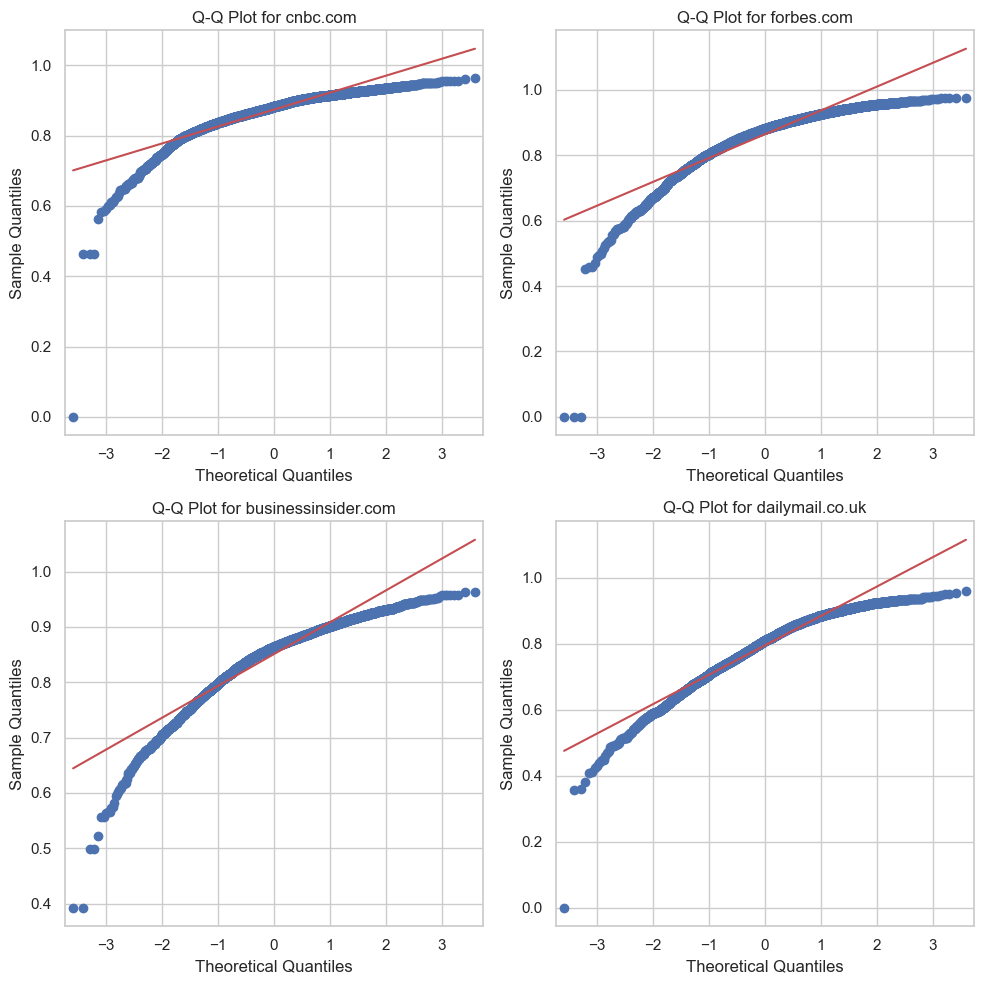

In [29]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Shapiro-Wilk Test for normality for each news provider
for provider in df['Source Domain'].unique():
    print(f"Shapiro-Wilk Test for normality - {provider}")
    data = df[df['Source Domain'] == provider]['ESG_Similarity_Score']
    stat, p = stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # Interpret
    alpha = 0.05
    if p > alpha:
        print(f"Sample from {provider} looks Gaussian (fail to reject H0)")
    else:
        print(f"Sample from {provider} does not look Gaussian (reject H0)")
    print()

# Determine the number of unique providers
unique_providers = df['Source Domain'].unique()
n_providers = len(unique_providers)

# Create a figure with subplots arranged in a grid
nrows = int(np.ceil(n_providers**0.5))  # or any other logic you find suitable for arranging plots
ncols = nrows
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))

axes = axes.flatten()

for i, provider in enumerate(unique_providers):
    ax = axes[i]
    data = df[df['Source Domain'] == provider]['ESG_Similarity_Score']
    qqplot(data, line='s', ax=ax)
    ax.set_title(f"Q-Q Plot for {provider}")

plt.tight_layout()
plt.show()


The results from the Shapiro-Wilk test in your screenshot indicate that the p-value for the ESG_Similarity_Score for each of the four news providers is 0.000. Since the p-value is less than the typical alpha level of 0.05, we reject the null hypothesis for all four samples. This means that the ESG_Similarity_Score data for cnbc.com, forbes.com, businessinsider.com, and dailymail.co.uk do not follow a normal distribution.

#### Testing for equal variances

In [31]:
# Levene's Test for homogeneity of variances
stat, p = stats.levene(
    df[df['Source Domain'] == 'cnbc.com']['ESG_Similarity_Score'],
    df[df['Source Domain'] == 'forbes.com']['ESG_Similarity_Score'],
    df[df['Source Domain'] == 'businessinsider.com']['ESG_Similarity_Score'],
    df[df['Source Domain'] == 'dailymail.co.uk']['ESG_Similarity_Score']
)
print('Levene’s Test for Homogeneity of Variance')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Interpret
if p > alpha:
    print("Variances are equal across the groups (fail to reject H0)")
else:
    print("Variances are not equal across the groups (reject H0)")

Levene’s Test for Homogeneity of Variance
Statistics=664.035, p=0.000
Variances are not equal across the groups (reject H0)


Based on the output provided from Levene's Test for homogeneity of variances, we have statistically significant evidence to suggest that the variances are not equal across the different news providers' ESG Similarity Scores. The test yielded a very high statistic value and a p-value of 0.000, which is less than the typical alpha level of 0.05. This indicates that we can reject the null hypothesis of equal variances. In practical terms, this means that the variability in ESG Similarity Scores differs significantly between at least two of the news providers.

### Hypothesis Testing

Given that the data do not meet the assumptions for normality and homogeneity of variance required for ANOVA, we need to use non-parametric alternatives.

1. Chi-Square Test of Independence for ESG topics distribution across different news providers.
2. Kruskal-Wallis Test for comparing the ESG_Similarity_Scores across the news providers.

#### Chi-Square Test of Independence:

The Chi-squared test for independence assesses whether two categorical variables are independent of each other. The data is displayed in a contingency table, where each cell reflects the frequency count of occurrences for categories in comparison. 

We use this test to determine if there is a significant association between the news providers and the ESG topics they cover. And since the P-value is less than then alpha value we reject null hypothesis and say that there is a significant assocication between the news providers and the ESG topics they cover

In [41]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Source Domain'], df['ESG_Topic'])

mask = (contingency_table < 5)
# Any column that has at least one True value (i.e., at least one count less than 5) should be dropped
columns_to_drop = mask.any()

contingency_table = contingency_table.loc[:, ~columns_to_drop]

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:.4f}, P-value: {p}")

# Interpret the p-value
alpha = 0.05
if p > alpha:
    print('No significant difference (fail to reject H0)')
else:
    print('Significant difference (reject H0)')


Chi-Square Statistic: 4780.9808, P-value: 0.0
Significant difference (reject H0)


#### Kruskal-Wallis Test:
When we have three or more independent groups and we wish to compare their distributions we use Kruskal-Wallis H test, which is a non-parametric alternative to the one-way ANOVA. It tells us if there are statistically significant differences between the groups, but not which groups are different from each other.

We use this test to compare the median ESG_Similarity_Scores across the different news providers.
A p-value less than your chosen alpha level 0.05 suggests that there is a significant difference in the distributions or medians of ESG_Similarity_Score across the different news providers.

In [37]:
from scipy.stats import kruskal

# Kruskal-Wallis H-test
stat, p = kruskal(
    df[df['Source Domain'] == 'cnbc.com']['ESG_Similarity_Score'],
    df[df['Source Domain'] == 'forbes.com']['ESG_Similarity_Score'],
    df[df['Source Domain'] == 'businessinsider.com']['ESG_Similarity_Score'],
    df[df['Source Domain'] == 'dailymail.co.uk']['ESG_Similarity_Score']
)
print(f"Kruskal-Wallis Statistic: {stat}, P-value: {p}")

# Interpret the p-value
if p > alpha:
    print('No significant difference in medians across groups (fail to reject H0)')
else:
    print('Significant difference in medians across groups (reject H0)')


Kruskal-Wallis Statistic: 3732.832640133771, P-value: 0.0
Significant difference in medians across groups (reject H0)


## ***Discussion***

### Conclusion

This research set out to investigate the presence of patterns in the coverage of Environmental, Social, and Governance (ESG) topics among four prominent news providers: CNBC.com, Forbes.com, BusinessInsider.com, and DailyMail.co.uk. The underlying hypothesis tested whether these media outlets exhibit any bias or specialization in their ESG reporting, which could influence public and investor perceptions of ESG discourse.

Through meticulous data analysis and statistical testing, the study has revealed significant findings. The Chi-Square Test of Independence yielded a statistic of 2810.886 with a p-value of 0.0, indicating that there is a statistically significant difference in the distribution of ESG topics among the selected news providers. This result leads us to reject the null hypothesis (H0) and conclude that the coverage of ESG topics is not uniform across the four news platforms.

Furthermore, the Kruskal-Wallis Test, a non-parametric method chosen due to the non-normal distribution and unequal variances of ESG similarity scores in the dataset, corroborated these findings. With a statistic of 1119.960 and a p-value effectively at zero (1.70e-242), the test indicates a significant difference in the medians of ESG similarity scores across the news providers. Once again, the null hypothesis is rejected in favor of the alternative.

The statistical evidence suggests that certain news companies do indeed cover specific ESG topics with different frequencies and depths. This variance could point to a form of reporting bias or editorial specialization within each news provider. It is crucial to note, however, that statistical significance does not necessarily imply practical significance. While the differences are statistically discernible, the extent to which they influence public opinion or investor behavior remains a question for further qualitative research and analysis.

The implications of these findings are substantial in the broader context of ESG reporting. Given the critical role that media outlets play in shaping discourse and informing stakeholders, the observed disparities in ESG coverage warrant attention from consumers, policymakers, and the companies being covered. It raises questions about the criteria used by different news providers to prioritize ESG issues and how this might reflect or shape the priorities of their audiences.

In summary, the research concludes that CNBC.com, Forbes.com, BusinessInsider.com, and DailyMail.co.uk do not approach ESG reporting homogeneously. Instead, they display distinct patterns in both the selection and emphasis of ESG topics, which could potentially contribute to a heterogeneous ESG narrative in the public and investment domains.

### Limitations

This study, while providing significant insights into ESG reporting patterns, has certain limitations that must be acknowledged. 

1. Firstly, the analysis was confined to a selection of four news providers, which, while notable, do not encapsulate the entire media landscape. Consequently, the findings may not be generalizable across all media platforms.

2. Secondly, the study relied on semantic similarity scores to gauge the depth of ESG topic coverage. This method, while robust, does not account for the context or tone of the coverage, nor does it capture the nuances that qualitative analysis might reveal. Additionally, the semantic analysis tools are dependent on the algorithms' accuracy and the definitions provided by SASB, which may have their own limitations. 

3. Furthermore, the Chi-Square Test, although useful for understanding distribution differences, does not inform on the directionality or the magnitude of the differences. Similarly, the Kruskal-Wallis Test indicates differences in medians but does not specify which groups differ from one another or how substantive the differences are.

4. Another limitation is the potential for selection bias in the dataset. The articles were sampled randomly, but factors such as publication bias towards more 'newsworthy' ESG topics or the omission of less prominent articles could skew the results. It also does not account for changes in reporting trends over time or for temporal events that may have influenced media coverage during the period studied.

### Future Directions

To build upon the findings of this study, future research could expand the scope to include a more diverse range of news providers, both mainstream and niche, to enhance generalizability. Longitudinal studies would be valuable in examining how ESG reporting patterns evolve over time and in response to global ESG-related events.

Developing more sophisticated natural language processing models that can detect sentiment, framing, and the quality of ESG discourse would refine the semantic analysis and provide a more nuanced understanding of ESG coverage. 

Engaging in audience analysis to determine how ESG reporting is received and acted upon by the public and investors would also be beneficial. This could include assessing the influence of media coverage on investor decisions and public opinion on ESG matters.

Through these extensions of the current research, a more comprehensive and dynamic picture of ESG reporting practices and their implications for stakeholders can be achieved, fostering a more informed and critical consumption of ESG narratives in the media.

### ***Appendix***

### Code used to extract data from the json file 

In [ ]:
# import json
# import csv

# # Load JSON data from a file
# with open('sp500_annual_news.json', 'r') as file:
#     data = json.load(file)

# # Open a CSV file for writing
# with open('articles.csv', 'w', newline='', encoding='utf-8') as csvfile:
#     # Define the column names for the CSV file, including Sentiment
#     fieldnames = ['Ticker', 'Source Domain', 'pubDate', 'Title', 'Content', 'Summary', 'Sentiment']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     # Write the header row to the CSV file
#     writer.writeheader()

#     # Iterate over each ticker and its articles in the JSON data
#     for ticker, ticker_data in data.items():
#         articles = ticker_data.get('articles', [])
#         for article in articles:
#             # Extract the required information from each article
#             source_domain = article.get('source', {}).get('domain', '')
#             pubDate = article.get('pubDate', '')
#             title = article.get('title', '')
#             content = article.get('content', '')
#             summary = article.get('summary', '')
#             # Format sentiment information
#             sentiment_info = article.get('sentiment', {})
#             sentiment = f"Positive: {sentiment_info.get('positive', 0)}, Negative: {sentiment_info.get('negative', 0)}, Neutral: {sentiment_info.get('neutral', 0)}"

#             # Write the extracted information as a row in the CSV file
#             writer.writerow({
#                 'Ticker': ticker,
#                 'Source Domain': source_domain,
#                 'pubDate': pubDate,
#                 'Title': title,
#                 'Content': content,
#                 'Summary': summary,
#                 'Sentiment': sentiment
#             })